/compuworks/anaconda3/envs/ds/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


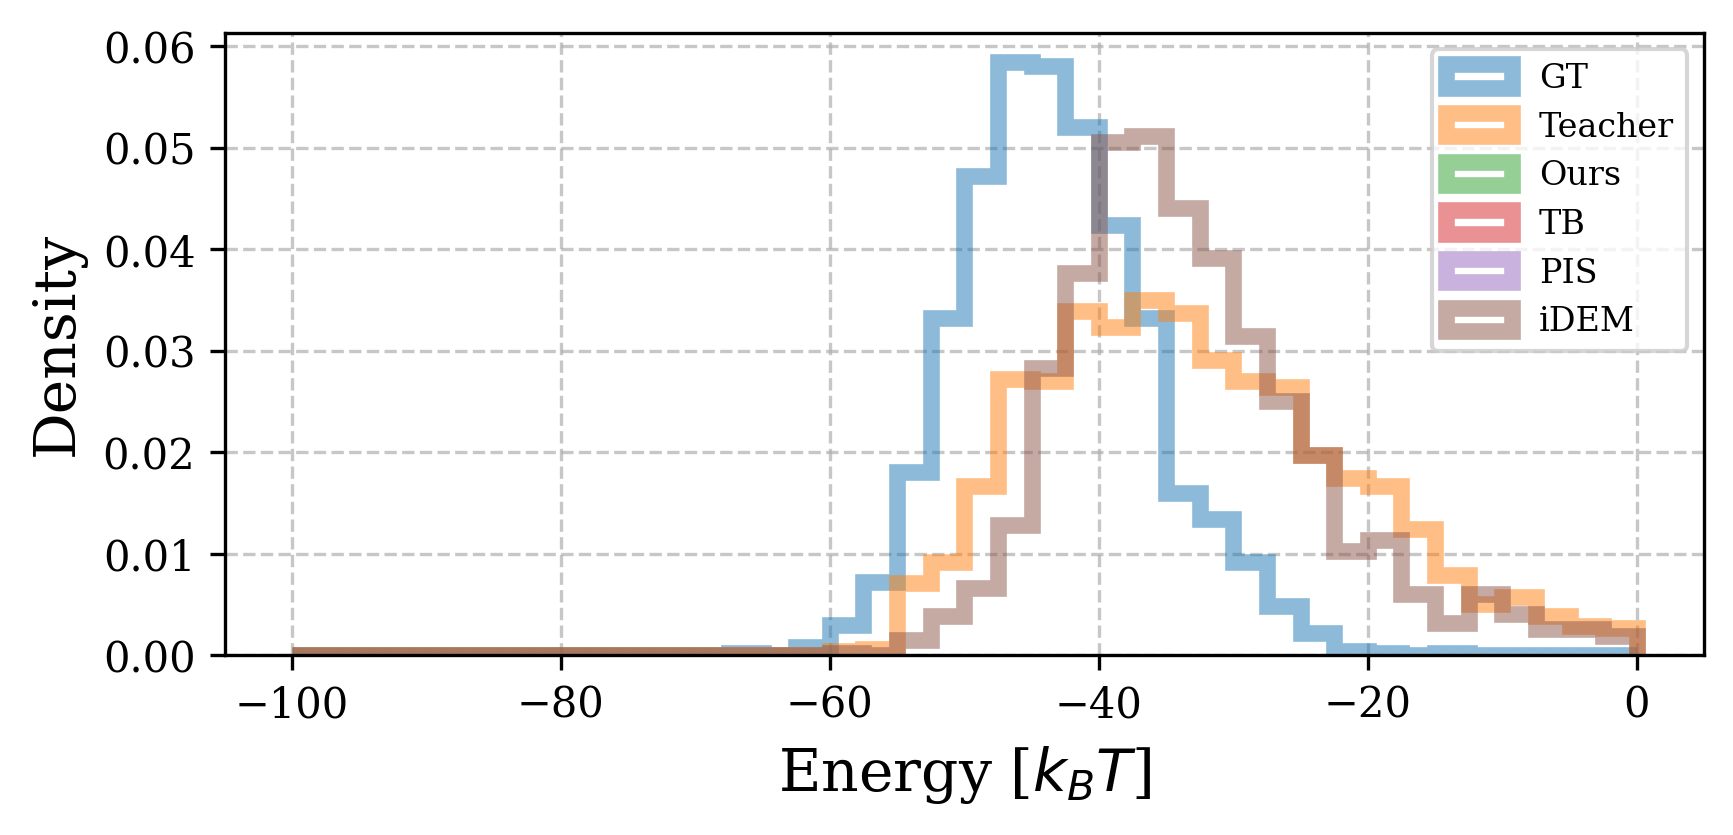

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif', 
    'font.size': 14,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'lines.linewidth': 1.5,
})

def plot_energy_hist(name, energy_dict, lower, upper):
    plt.figure(figsize=(6, 3))
    plt.xlabel("Energy [$k_B T$]", fontsize=14)
    
    for method, energy in energy_dict.items():
        plt.hist(energy, range=(lower, upper), bins=40, density=True, label=method, alpha=0.5, histtype="step", linewidth=4)

    plt.ylabel("Density", fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)
    plt.xticks()
    plt.yticks()
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'../figure/{name}_energy_hist.png')

name = 'lj13'
energy_dict = {
    'GT': np.load(f'../result/2025-05-05_21:50:37/energy/GT_0.npy'),
    'Teacher': np.load(f'../result/2025-05-05_21:50:37/energy/Teacher_0.npy'),
    'Ours': np.load('../result/2025-05-05_21:50:37/energy/Student_0.npy'),
    # 'TB+Expl+LP': np.load('../result/2025-05-05_21:50:39/energy/Student_0.npy'),
    # 'TB+Expl+LS+LP': np.load('../result/2025-05-05_21:50:41/energy/Student_0.npy'),
    # 'TB+Expl+LS': np.load('../result/2025-05-05_21:50:43/energy/Student_0.npy'),
    # 'TB+LP': np.load('../result/2025-05-05_21:50:45/energy/Student_0.npy'),
    # 'TB+LS+LP': np.load('../result/2025-05-05_21:50:47/energy/Student_0.npy'),
    'TB': np.load('../result/2025-05-05_21:50:49/energy/Student_0.npy'),
    'PIS': np.load('../result/2025-05-05_21:50:51/energy/Student_0.npy'),
    'iDEM': np.load(f'../result/iDEM_{name}/energy/Student.npy'),
}

lower = -100
upper = 0

# name = 'lj55'
# energy_dict = {
#     'GT': np.load(f'../result/2025-05-05_21:50:37/energy/GT_0.npy'),
#     'Teacher': np.load(f'../result/2025-05-05_21:50:37/energy/Teacher_0.npy'),
#     'Ours': np.load('../result/2025-05-05_21:50:37/energy/Student_0.npy'),
#     'TB+Expl+LP': np.load('../result/2025-05-05_21:50:39/energy/Student_0.npy'),
#     'TB+Expl+LS+LP': np.load('../result/2025-05-05_21:50:41/energy/Student_0.npy'),
#     'TB+Expl+LS': np.load('../result/2025-05-05_21:50:43/energy/Student_0.npy'),
#     'TB+LP': np.load('../result/2025-05-05_21:50:45/energy/Student_0.npy'),
#     'TB+LS+LP': np.load('../result/2025-05-05_21:50:47/energy/Student_0.npy'),
#     'TB': np.load('../result/2025-05-05_21:50:49/energy/Student_0.npy'),
#     'PIS': np.load('../result/2025-05-05_21:50:51/energy/Student_0.npy'),
#     'iDEM': np.load(f'../result/iDEM_{name}/energy/Student.npy'),
# }

# lower = -100
# upper = 0

# name = 'aldp'
# energy_dict = {
#     'GT': np.load(f'../result/2025-05-05_21:50:37/energy/GT_0.npy'),
#     'Teacher': np.load(f'../result/2025-05-05_21:50:37/energy/Teacher_0.npy'),
#     'Ours': np.load('../result/2025-05-05_21:50:37/energy/Student_0.npy'),
#     'MLE': np.load('../result/2025-05-05_21:50:37/energy/Student_0.npy'),
#     'FAB': np.load(f'../result/FAB_{name}/energy/Student.npy'),
# }

# lower = -522000
# upper = -520000

plot_energy_hist(name, energy_dict, lower, upper)